In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import datetime as dt

## <Class1 : 가구/침구/인테리어>

In [448]:
Class1 = pd.read_csv('C:/Users/wjssm/Desktop/lpoint/modeling/Class1.csv')
Class1['Date'] = pd.date_range('2018-04-01', '2018-09-30').strftime('%Y-%m-%d')
Class1['Date'] =pd.to_datetime(Class1['Date'])
Class1 = Class1.set_index('Date')
Class1.head()

,BUY_CT_sum,HITS_SEQ_mean,TOT_SESS_HR_V_mean,CLNT_AGE_mean,furniture
Date,,,,,
2018-04-01,1306,74.850340,1719.490868,35.022676,88.000000
2018-04-02,2280,67.553411,1756.592258,34.607465,88.000000
2018-04-03,1615,70.748404,1703.317481,34.291188,83.111111
2018-04-04,2079,59.063566,1525.807812,34.294574,83.111111
2018-04-05,4097,66.813036,1678.644214,34.150943,80.666667


In [76]:
pd.date_range('2018-04-01', '2018-09-30').strftime('%Y-%m-%d')

Index(['2018-04-01', '2018-04-02', '2018-04-03', '2018-04-04', '2018-04-05',
       '2018-04-06', '2018-04-07', '2018-04-08', '2018-04-09', '2018-04-10',
       ...
       '2018-09-21', '2018-09-22', '2018-09-23', '2018-09-24', '2018-09-25',
       '2018-09-26', '2018-09-27', '2018-09-28', '2018-09-29', '2018-09-30'],
      dtype='object', length=183)

In [10]:
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    diff.append(dataset[0])
    for i in range(interval, len(dataset)):
            value = dataset[i] - dataset[i - interval]
            diff.append(value)
    return pd.Series(diff)

In [11]:
# inverse_difference
def inverse_difference(diff, interval=1):
    origin = list()
    origin.append(diff[0])
    for i in range(interval, len(diff)):
            value = diff[i] + origin[i - interval]
            origin.append(value)
    return pd.Series(origin)

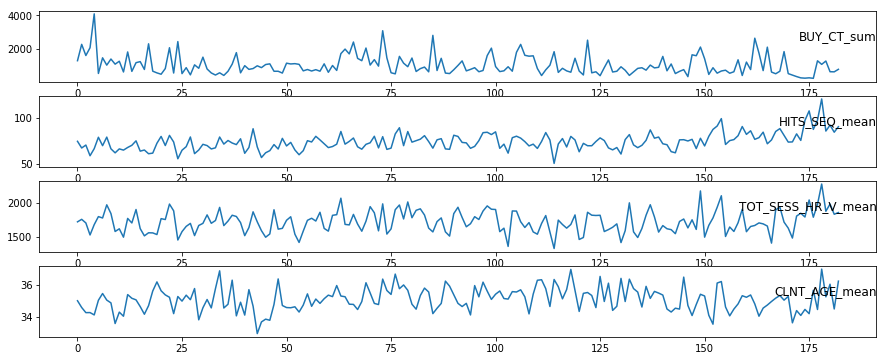

In [14]:
#Plot of all variables
values = Class1.values
# specify columns to plot
groups = [0, 1, 2, 3]
i = 1
# plot each column
plt.figure(figsize=(15,6))
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group])
    plt.title(Class1.columns[group], y=0.5, loc='right')
    i += 1
plt.show()

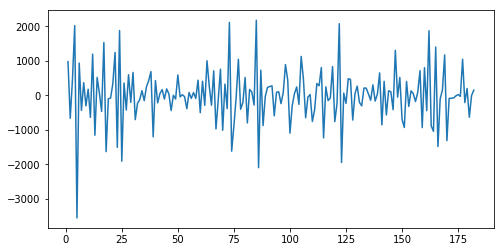

In [449]:
#with diff
Y = Class1['BUY_CT_sum']
diff = difference(Y)[1:]
diff.plot(figsize=(8,4))
plt.show()

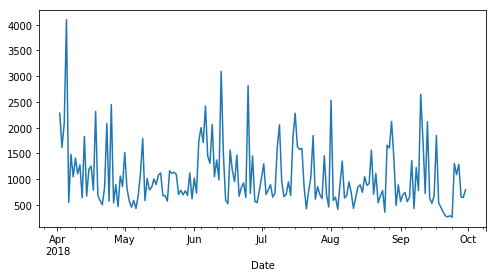

In [13]:
#without diff
Y[1:].plot(figsize=(8,4))
plt.show()

In [14]:
"""
diff=difference(Y)
diff.index=Class1.index
df1=pd.concat([Class1,diff],axis=1)
#make dataset 'df1' with diff
diff.index=Class1.index
df1=pd.concat([Class1,diff],axis=1)
df1.rename(columns={0: 'diff_Y'}, inplace=True)
df1.head()

"""

,BUY_CT_sum,HITS_SEQ_mean,TOT_SESS_HR_V_mean,CLNT_AGE_mean,furniture,0
Date,,,,,,
2018-04-01,1306,74.850340,1719.490868,35.022676,88.000000,1306
2018-04-02,2280,67.553411,1756.592258,34.607465,88.000000,974
2018-04-03,1615,70.748404,1703.317481,34.291188,83.111111,-665
2018-04-04,2079,59.063566,1525.807812,34.294574,83.111111,464
2018-04-05,4097,66.813036,1678.644214,34.150943,80.666667,2018


In [450]:
Class1.head()

,BUY_CT_sum,HITS_SEQ_mean,TOT_SESS_HR_V_mean,CLNT_AGE_mean,furniture
Date,,,,,
2018-04-01,1306,74.850340,1719.490868,35.022676,88.000000
2018-04-02,2280,67.553411,1756.592258,34.607465,88.000000
2018-04-03,1615,70.748404,1703.317481,34.291188,83.111111
2018-04-04,2079,59.063566,1525.807812,34.294574,83.111111
2018-04-05,4097,66.813036,1678.644214,34.150943,80.666667


In [451]:
#remove original Y
Class1.drop(columns=['BUY_CT_sum'],inplace=True)
Class1.rename(columns = {'furniture' : 'naver_click'}, inplace=True)
Class1.head()

,HITS_SEQ_mean,TOT_SESS_HR_V_mean,CLNT_AGE_mean,furniture
Date,,,,
2018-04-01,74.850340,1719.490868,35.022676,88.000000
2018-04-02,67.553411,1756.592258,34.607465,88.000000
2018-04-03,70.748404,1703.317481,34.291188,83.111111
2018-04-04,59.063566,1525.807812,34.294574,83.111111
2018-04-05,66.813036,1678.644214,34.150943,80.666667


In [455]:
Class1['CLNT_AGE_mean'] = 1/Class1['CLNT_AGE_mean']

In [456]:
Class1.head()

,HITS_SEQ_mean,TOT_SESS_HR_V_mean,CLNT_AGE_mean,furniture
Date,,,,
2018-04-01,74.850340,1719.490868,0.028553,88.000000
2018-04-02,67.553411,1756.592258,0.028896,88.000000
2018-04-03,70.748404,1703.317481,0.029162,83.111111
2018-04-04,59.063566,1525.807812,0.029159,83.111111
2018-04-05,66.813036,1678.644214,0.029282,80.666667


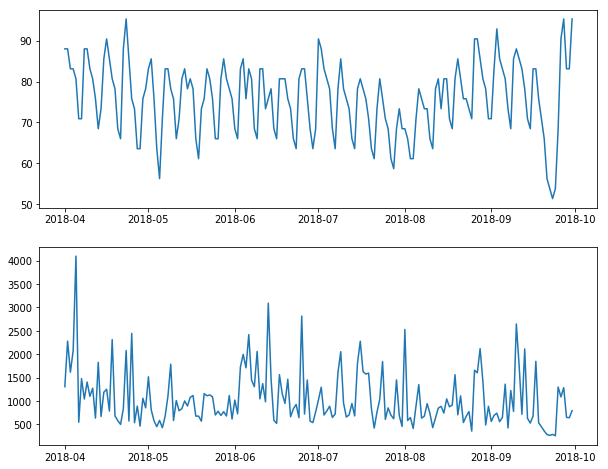

In [31]:
plt.figure(figsize=(10,8))
plt.subplot(211)
plt.plot(df1['naver_click'])
plt.subplot(212)
plt.plot(Y)

#### 1.ACF

In [32]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

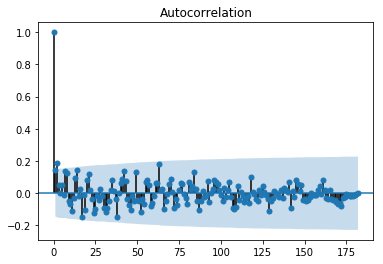

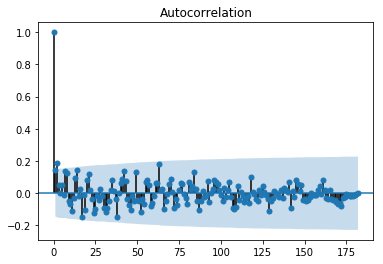

In [33]:
#original data
plot_acf(Y, ax = plt.gca())

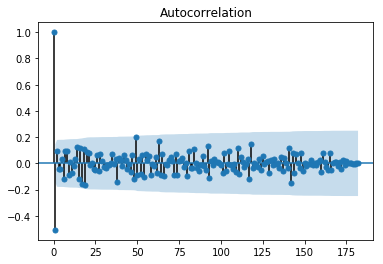

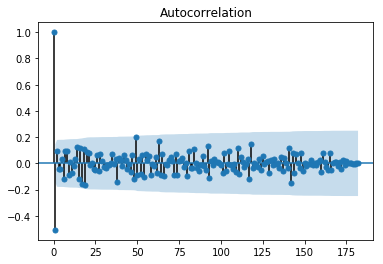

In [34]:
#difference data
plot_acf(df1['diff_Y'], ax = plt.gca())

### 2. scale

In [17]:
def minmax(dataset):
    dataNorm=((dataset-dataset.min())/(dataset.max()-dataset.min()))
    return dataNorm

In [457]:
scaled_df1=minmax(Class1)
#(xi–mean(x))/stdev(x)
scaled_df1.head()

,HITS_SEQ_mean,TOT_SESS_HR_V_mean,CLNT_AGE_mean,furniture
Date,,,,
2018-04-01,0.342822,0.413383,0.462197,0.833333
2018-04-02,0.239338,0.452389,0.567720,0.833333
2018-04-03,0.284649,0.396380,0.649813,0.722222
2018-04-04,0.118936,0.209758,0.648926,0.722222
2018-04-05,0.228838,0.370440,0.686702,0.666667


In [453]:
scaled_Y = minmax(Y)

scaled_df1 = pd.concat([scaled_df1, scaled_Y], axis = 1)
scaled_df1.rename(columns={'BUY_CT_sum':'Y'}, inplace=True)

scaled_df1.head()

,HITS_SEQ_mean,TOT_SESS_HR_V_mean,CLNT_AGE_mean,furniture,Y
Date,,,,,
2018-04-01,0.342822,0.413383,0.509541,0.833333,0.273366
2018-04-02,0.239338,0.452389,0.404708,0.833333,0.526946
2018-04-03,0.284649,0.396380,0.324854,0.722222,0.353814
2018-04-04,0.118936,0.209758,0.325709,0.722222,0.474616
2018-04-05,0.228838,0.370440,0.289445,0.666667,1.000000


In [ ]:
sca

In [85]:
def inverse_minmax(norm,dataset):
    deNorm=norm*(dataset.max()-dataset.min())+dataset.min()
    return deNorm

### 3.plot

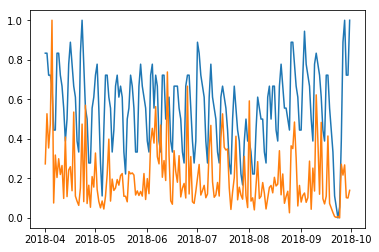

In [40]:
plt.plot(scaled_df1['naver_click'])
plt.plot(scaled_Y)

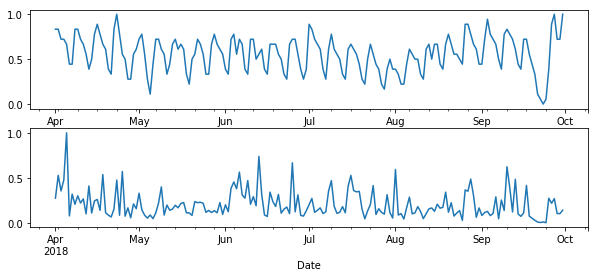

In [41]:
#scaled plot
plt.subplot(211)
scaled_df1['naver_click'].plot(figsize=(10, 4))
plt.subplot(212)
scaled_Y.plot(figsize=(10,4))

In [42]:
import statsmodels.api as sm
from pylab import rcParams

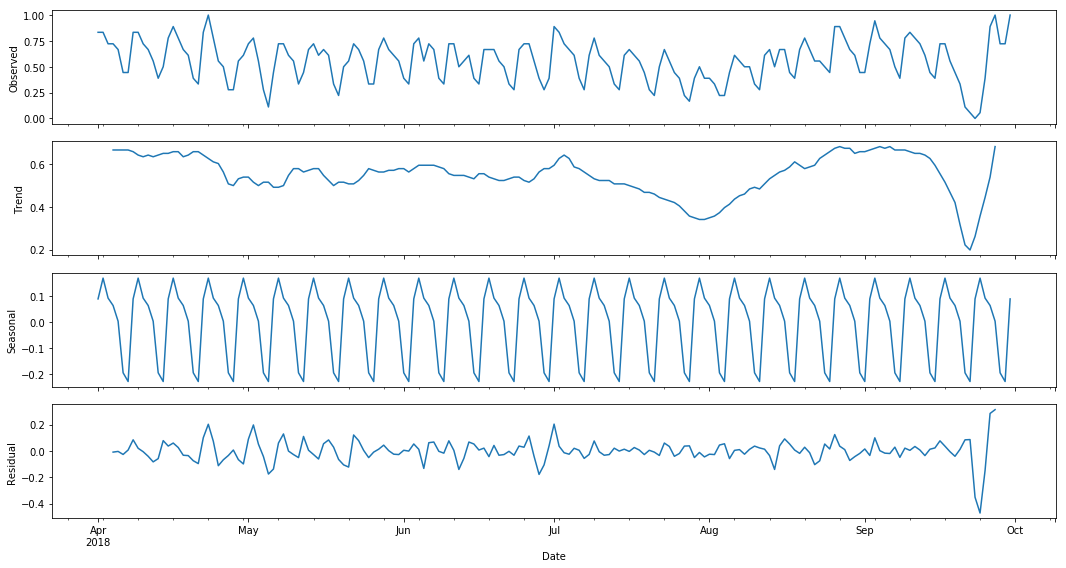

In [43]:
rcParams['figure.figsize'] = 15, 8
decomposition = sm.tsa.seasonal_decompose(scaled_df1['naver_click'], model='additive')
fig = decomposition.plot()
plt.show()

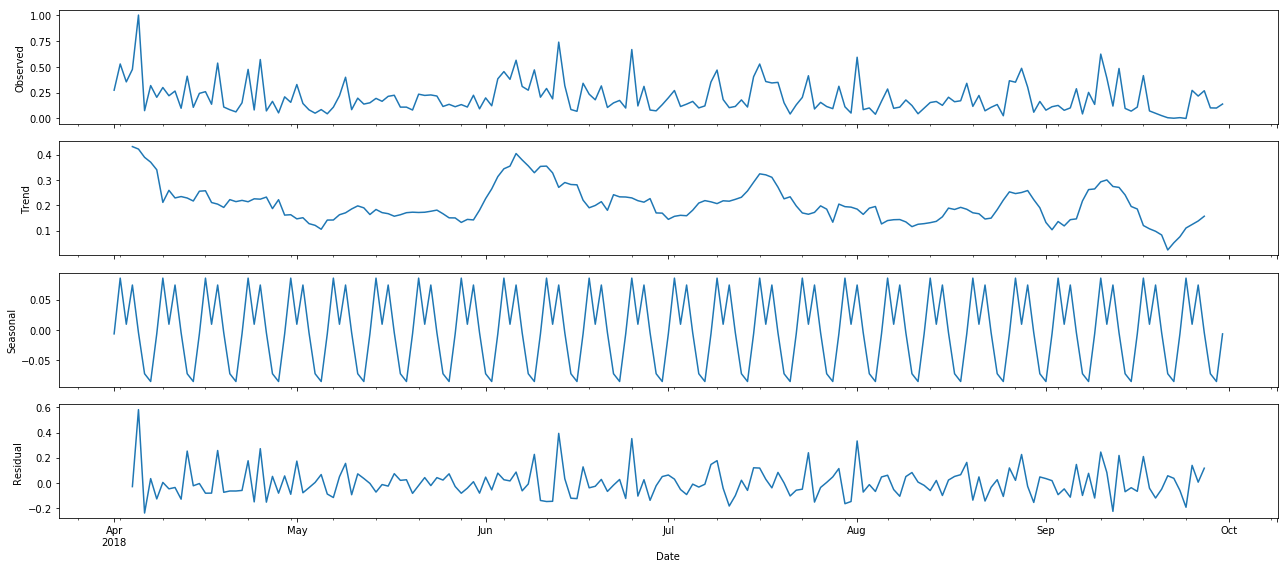

In [44]:
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(scaled_Y, model='additive')
fig = decomposition.plot()
plt.show()

In [40]:
np.corrcoef(scaled_df1['naver_click'],scaled_Y)

array([[1.        , 0.39512501],
       [0.39512501, 1.        ]])

##### trend plot

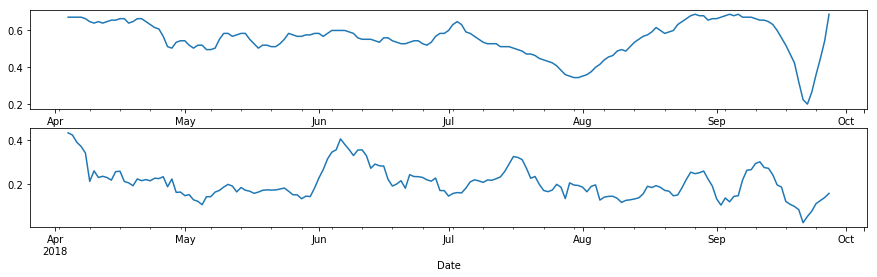

In [45]:
rcParams['figure.figsize'] = 15, 4

plt.subplot(211)
decomposition = sm.tsa.seasonal_decompose(scaled_df1['naver_click'], model='additive')
fig = decomposition.trend.plot()
plt.subplot(212)
decomposition = sm.tsa.seasonal_decompose(scaled_Y, model='additive')
fig = decomposition.trend.plot()

##### seasonal plot

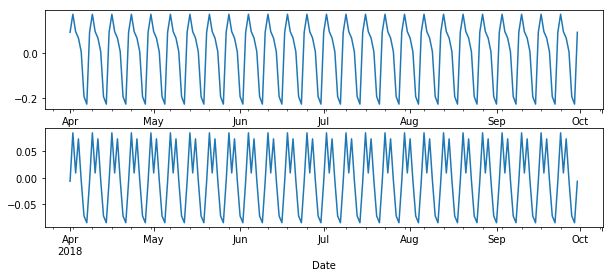

In [46]:
rcParams['figure.figsize'] = 10, 4

plt.subplot(211)
decomposition = sm.tsa.seasonal_decompose(scaled_df1['naver_click'], model='additive',)
fig = decomposition.seasonal.plot()
plt.subplot(212)
decomposition = sm.tsa.seasonal_decompose(scaled_Y, model='additive')
fig = decomposition.seasonal.plot()

### 3. modeling

In [266]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### with the scaled data

In [23]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [442]:
scaled_df1.head()

,HITS_SEQ_mean,TOT_SESS_HR_V_mean,CLNT_AGE_mean,furniture,Y
Date,,,,,
2018-04-01,0.342822,0.413383,0.509541,0.833333,0.273366
2018-04-02,0.239338,0.452389,0.404708,0.833333,0.526946
2018-04-03,0.284649,0.396380,0.324854,0.722222,0.353814
2018-04-04,0.118936,0.209758,0.325709,0.722222,0.474616
2018-04-05,0.228838,0.370440,0.289445,0.666667,1.000000


In [444]:
scaled_df1['CLNT_AGE_mean'] = 1/scaled_df1['CLNT_AGE_mean']

In [446]:
scaled_df1.head()

,HITS_SEQ_mean,TOT_SESS_HR_V_mean,CLNT_AGE_mean,furniture,Y
Date,,,,,
2018-04-01,0.342822,0.413383,1.962552,0.833333,0.273366
2018-04-02,0.239338,0.452389,2.470917,0.833333,0.526946
2018-04-03,0.284649,0.396380,3.078302,0.722222,0.353814
2018-04-04,0.118936,0.209758,3.070223,0.722222,0.474616
2018-04-05,0.228838,0.370440,3.454882,0.666667,1.000000


In [424]:
#scaled_df1.drop(columns=['CLNT_AGE_mean'],inplace=True)

In [445]:
values = scaled_df1.values

# frame as supervised learning
reframed = series_to_supervised(scaled_df1, 1, 1)
reframed.head()


,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var1(t),var2(t),var3(t),var4(t),var5(t)
Date,,,,,,,,,,
2018-04-02,0.342822,0.413383,1.962552,0.833333,0.273366,0.239338,0.452389,2.470917,0.833333,0.526946
2018-04-03,0.239338,0.452389,2.470917,0.833333,0.526946,0.284649,0.396380,3.078302,0.722222,0.353814
2018-04-04,0.284649,0.396380,3.078302,0.722222,0.353814,0.118936,0.209758,3.070223,0.722222,0.474616
2018-04-05,0.118936,0.209758,3.070223,0.722222,0.474616,0.228838,0.370440,3.454882,0.666667,1.000000
2018-04-06,0.228838,0.370440,3.454882,0.666667,1.000000,0.405581,0.494630,1.936049,0.444444,0.075501


In [426]:
# drop columns we don't want to predict
reframed.drop(reframed.columns[-4:-1], axis=1, inplace=True)
reframed.head()

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var4(t)
Date,,,,,
2018-04-02,0.342822,0.413383,0.833333,0.273366,0.526946
2018-04-03,0.239338,0.452389,0.833333,0.526946,0.353814
2018-04-04,0.284649,0.396380,0.722222,0.353814,0.474616
2018-04-05,0.118936,0.209758,0.722222,0.474616,1.000000
2018-04-06,0.228838,0.370440,0.666667,1.000000,0.075501


In [427]:
values.shape

(183, 4)

In [428]:
# split into train and test sets
values = reframed.values
n_train = int(len(df1)*0.8)
train = values[:n_train, :]
test = values[n_train:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(146, 1, 4) (146,) (36, 1, 4) (36,)


In [429]:
# design network
model = Sequential()
model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1, activation="relu"))
model.compile(loss='mse', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=300, batch_size=70, validation_data=(test_X, test_y), verbose=2, shuffle=False)

Train on 146 samples, validate on 36 samples
Epoch 1/300
 - 8s - loss: 0.0613 - val_loss: 0.0421
Epoch 2/300
 - 0s - loss: 0.0514 - val_loss: 0.0339
Epoch 3/300
 - 0s - loss: 0.0423 - val_loss: 0.0281
Epoch 4/300
 - 0s - loss: 0.0352 - val_loss: 0.0243
Epoch 5/300
 - 0s - loss: 0.0300 - val_loss: 0.0224
Epoch 6/300
 - 0s - loss: 0.0264 - val_loss: 0.0219
Epoch 7/300
 - 0s - loss: 0.0243 - val_loss: 0.0224
Epoch 8/300
 - 0s - loss: 0.0232 - val_loss: 0.0231
Epoch 9/300
 - 0s - loss: 0.0227 - val_loss: 0.0238
Epoch 10/300
 - 0s - loss: 0.0226 - val_loss: 0.0241
Epoch 11/300
 - 0s - loss: 0.0225 - val_loss: 0.0240
Epoch 12/300
 - 0s - loss: 0.0225 - val_loss: 0.0236
Epoch 13/300
 - 0s - loss: 0.0225 - val_loss: 0.0232
Epoch 14/300
 - 0s - loss: 0.0226 - val_loss: 0.0228
Epoch 15/300
 - 0s - loss: 0.0228 - val_loss: 0.0224
Epoch 16/300
 - 0s - loss: 0.0231 - val_loss: 0.0222
Epoch 17/300
 - 0s - loss: 0.0233 - val_loss: 0.0220
Epoch 18/300
 - 0s - loss: 0.0235 - val_loss: 0.0219
Epoch 19/3

Epoch 154/300
 - 0s - loss: 0.0231 - val_loss: 0.0219
Epoch 155/300
 - 0s - loss: 0.0231 - val_loss: 0.0219
Epoch 156/300
 - 0s - loss: 0.0231 - val_loss: 0.0219
Epoch 157/300
 - 0s - loss: 0.0231 - val_loss: 0.0219
Epoch 158/300
 - 0s - loss: 0.0231 - val_loss: 0.0219
Epoch 159/300
 - 0s - loss: 0.0231 - val_loss: 0.0219
Epoch 160/300
 - 0s - loss: 0.0231 - val_loss: 0.0219
Epoch 161/300
 - 0s - loss: 0.0231 - val_loss: 0.0219
Epoch 162/300
 - 0s - loss: 0.0231 - val_loss: 0.0219
Epoch 163/300
 - 0s - loss: 0.0231 - val_loss: 0.0219
Epoch 164/300
 - 0s - loss: 0.0231 - val_loss: 0.0219
Epoch 165/300
 - 0s - loss: 0.0231 - val_loss: 0.0219
Epoch 166/300
 - 0s - loss: 0.0231 - val_loss: 0.0219
Epoch 167/300
 - 0s - loss: 0.0231 - val_loss: 0.0219
Epoch 168/300
 - 0s - loss: 0.0231 - val_loss: 0.0219
Epoch 169/300
 - 0s - loss: 0.0231 - val_loss: 0.0219
Epoch 170/300
 - 0s - loss: 0.0231 - val_loss: 0.0219
Epoch 171/300
 - 0s - loss: 0.0231 - val_loss: 0.0219
Epoch 172/300
 - 0s - loss: 

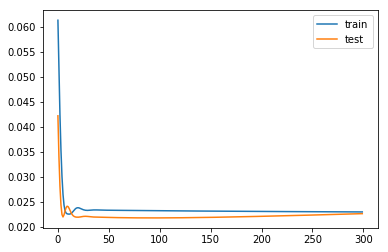

In [430]:
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [431]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
true_Y = Y.values[n_train+1:].reshape(yhat.shape[0],1)

In [435]:
# invert scaling for forecast
dfhat = np.concatenate((true_Y,yhat), axis = 1)
#inv_dfhat = scaler.inverse_transform(dfhat)
inv_yhat = inverse_minmax(dfhat[:,1],dfhat[:,0])
inv_yhat

In [437]:
# calculate RMSE
rmse = np.sqrt(mean_squared_error(true_Y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 592.366


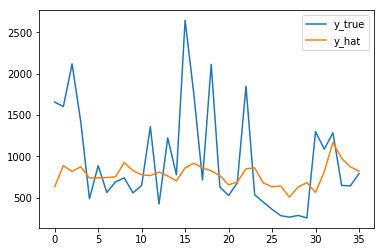

In [438]:
plt.plot(true_Y, label = 'y_true')
plt.plot(inv_yhat,label = 'y_hat')
plt.legend()

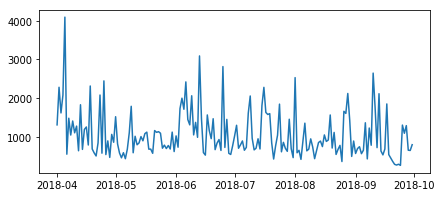

In [410]:
plt.figure(figsize=(7,3))
plt.plot(Y, label = 'y_true')

In [379]:
inv_yhat = pd.Series(inv_yhat)
inv_yhat.index = Y[n_train+1:,].index

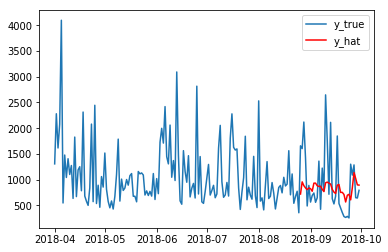

In [380]:
plt.plot(Y, label = 'y_true')
plt.plot(inv_yhat,label = 'y_hat', c='r')
plt.legend()